In [1]:
# Python

import pandas as pd
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [ ]:
import sys
!{sys.executable} -m pip install prophet

In [2]:
df = pd.read_csv ("cases_keywords_complete_V2 - Hoja 1.csv")

In [3]:
df.head()

,fecha,Index,casos,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza,suma_keys_sintomas,tengo covid,sintomas covid,test covid,suma_keys_preguntas
0,1/1/20,1,1.0,27.0,4.0,17.0,2.0,12.0,62.0,0.0,0.0,0.0,0.0
1,2/1/20,2,0.0,16.0,4.0,17.0,2.0,5.0,44.0,0.0,0.0,0.0,0.0
2,3/1/20,3,1.0,23.0,7.0,19.0,3.0,6.0,58.0,0.0,0.0,0.0,0.0
3,4/1/20,4,0.0,21.0,4.0,18.0,2.0,7.0,52.0,0.0,0.0,0.0,0.0
4,5/1/20,5,0.0,16.0,5.0,15.0,2.0,10.0,48.0,0.0,0.0,0.0,0.0


In [4]:
data = df.drop(["tos","Index","suma_keys_sintomas","suma_keys_preguntas", "dolor de garganta", "fiebre", "cansancio", "dolor de cabeza", "tengo covid", "sintomas covid", "test covid"],axis=1)

In [5]:
data.head()

,fecha,casos
0,1/1/20,1.0
1,2/1/20,0.0
2,3/1/20,1.0
3,4/1/20,0.0
4,5/1/20,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   573 non-null    object 
 1   casos   570 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [7]:
data["fecha"] = pd.to_datetime(data["fecha"],"Y-%m-%d")

AssertionError: 

In [8]:
data.head()

,fecha,casos
0,1/1/20,1.0
1,2/1/20,0.0
2,3/1/20,1.0
3,4/1/20,0.0
4,5/1/20,0.0


In [10]:
data = data.rename(columns = {"fecha":"ds", "casos":"y"})

In [11]:
m = Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
668,2022-03-13
669,2022-03-14
670,2022-03-15
671,2022-03-16
672,2022-03-17


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
668,2022-03-13,11392.104696,2505.896162,20280.141831
669,2022-03-14,12964.911743,4081.715738,21360.641636
670,2022-03-15,13442.060062,4038.453714,22252.152863
671,2022-03-16,13903.189418,4009.559569,22627.028804
672,2022-03-17,13390.919921,3950.769873,22125.784191


In [ ]:
forecast.head()

In [ ]:
forecast = forecast[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)

In [ ]:
forecast["ds"] = data["ds"]

In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,932.062626,-7794.526560,10458.918024,932.062626,932.062626,921.169104,921.169104,921.169104,921.169104,921.169104,921.169104,0.0,0.0,0.0,1853.231730
1,2020-01-02,958.374039,-7935.980803,10140.207622,958.374039,958.374039,402.452172,402.452172,402.452172,402.452172,402.452172,402.452172,0.0,0.0,0.0,1360.826212
2,2020-01-03,984.685452,-6591.635469,10934.558811,984.685452,984.685452,462.388583,462.388583,462.388583,462.388583,462.388583,462.388583,0.0,0.0,0.0,1447.074035
3,2020-01-04,1010.996865,-8941.767286,8746.458114,1010.996865,1010.996865,-677.710032,-677.710032,-677.710032,-677.710032,-677.710032,-677.710032,0.0,0.0,0.0,333.286833
4,2020-01-05,1037.308278,-10142.171003,7883.956592,1037.308278,1037.308278,-1570.573311,-1570.573311,-1570.573311,-1570.573311,-1570.573311,-1570.573311,0.0,0.0,0.0,-533.265033


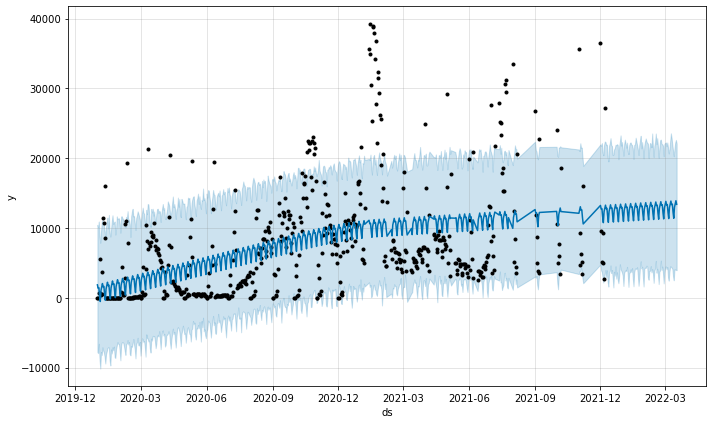

In [15]:
fig1 = m.plot(forecast)


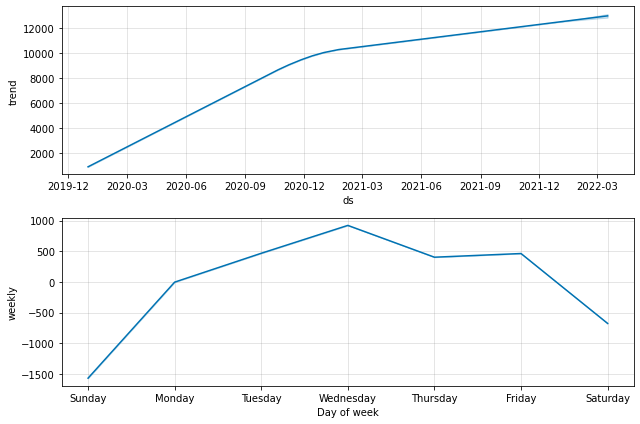

In [16]:
fig2 = m.plot_components(forecast)


In [17]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [18]:
plot_components_plotly(m, forecast)


NameError: name 'go' is not defined